# Setup

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training = pd.read_csv('./computer-prices-2025/computer_prices_all.csv', index_col='ID')
testing = pd.read_csv('./computer-prices-2025/computer_prices_test.csv', index_col='ID')

training.head(5)

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
ID,,,,,,,,,,,,,,,,,,,,,
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99


# EDA

In [3]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null  object 
 15  gpu_tier             10

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
count,100000,100000,100000,100000.000000,100000,100000,100000,100000,100000.000000,100000.000000,...,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.00000,100000.000000
unique,2,10,99036,NaN,4,10,3,26971,NaN,NaN,...,6,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,Laptop,Lenovo,Lenovo Think 0V5,NaN,Windows,Mainstream,Intel,Apple M2 Pro,NaN,NaN,...,1920x1080,NaN,NaN,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN,NaN
freq,59844,15992,3,NaN,71817,17819,52774,1389,NaN,NaN,...,47993,NaN,NaN,NaN,NaN,46149,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2022.320850,NaN,NaN,NaN,NaN,3.153490,10.515740,...,NaN,98.464860,41.813470,61.383450,272.520500,NaN,5.084764,4.289699,22.20036,1928.764220
std,NaN,NaN,NaN,2.025761,NaN,NaN,NaN,NaN,1.373175,5.044092,...,NaN,43.301652,35.868841,62.795034,354.686355,NaN,0.245977,3.814628,10.23190,580.492689
min,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,4.000000,...,NaN,60.000000,0.000000,0.000000,0.000000,NaN,4.200000,0.920000,12.00000,372.990000
25%,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,2.000000,6.000000,...,NaN,60.000000,0.000000,0.000000,0.000000,NaN,5.000000,1.500000,12.00000,1503.990000
50%,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,3.000000,8.000000,...,NaN,90.000000,56.000000,65.000000,0.000000,NaN,5.100000,2.000000,24.00000,1863.990000
75%,NaN,NaN,NaN,2024.000000,NaN,NaN,NaN,NaN,4.000000,14.000000,...,NaN,120.000000,70.000000,90.000000,650.000000,NaN,5.200000,7.000000,24.00000,2287.990000


In [4]:
def get_vars(df, exclude_cols=None):
    """
    Identify variable types based on dtype + unique counts.

    Returns:
        {
            "numerical_vars": ...,
            "categorical_vars": ...,
            "continuous_vars": ...,
            "discrete_vars": ...,
            "binary_vars": ...,
            "true_numerical_vars": ...,
            "true_categorical_vars": ...,
            "all_vars": ...
        }
    """
    if exclude_cols is None:
        exclude_cols = []

    # --------------------
    # Base variable groups
    # --------------------
    numerical_vars = df.select_dtypes(include=["number"]).columns.tolist()
    categorical_vars = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # Remove excluded columns from each list
    numerical_vars = [c for c in numerical_vars if c not in exclude_cols]
    categorical_vars = [c for c in categorical_vars if c not in exclude_cols]

    # --------------------
    # Continuous vs Discrete
    # --------------------
    continuous_vars = []
    discrete_vars = []

    n_rows = len(df)

    for col in numerical_vars:
        n_unique = df[col].nunique(dropna=True)

        if (n_unique <= 10) or (df[col].dtype.kind in "iu" and n_unique / n_rows < 0.01):
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)

    # --------------------
    # Binary detection (among discrete vars)
    # --------------------
    binary_vars = []
    nonbinary_discrete = discrete_vars.copy()

    for col in nonbinary_discrete.copy():
        unique_vals = df[col].dropna().unique()
        n_unique = len(unique_vals)

        if n_unique == 2:
            binary_vars.append(col)
            discrete_vars.remove(col)

    # --------------------
    # Final "true" groups
    # --------------------
    true_numerical_vars = continuous_vars + discrete_vars
    true_categorical_vars = categorical_vars + binary_vars
    all_vars = true_numerical_vars + true_categorical_vars

    # --------------------
    # Return everything
    # --------------------
    return {
        "numerical_vars": numerical_vars,
        "categorical_vars": categorical_vars,
        "continuous_vars": continuous_vars,
        "discrete_vars": discrete_vars,
        "binary_vars": binary_vars,
        "true_numerical_vars": true_numerical_vars,
        "true_categorical_vars": true_categorical_vars,
        "all_vars": all_vars
    }

vars_dict = get_vars(training, ["price"])

print("Numerical:", vars_dict["numerical_vars"])
print("Categorical:", vars_dict["categorical_vars"])
print("Continuous:", vars_dict["continuous_vars"])
print("Discrete:", vars_dict["discrete_vars"])
print("Binary:", vars_dict["binary_vars"])
print("True numerical:", vars_dict["true_numerical_vars"])
print("True categorical:", vars_dict["true_categorical_vars"])
print("All vars:", vars_dict["all_vars"])

Numerical: ['release_year', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb', 'storage_drive_count', 'display_size_in', 'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'bluetooth', 'weight_kg', 'warranty_months']
Categorical: ['device_type', 'brand', 'model', 'os', 'form_factor', 'cpu_brand', 'cpu_model', 'gpu_brand', 'gpu_model', 'storage_type', 'display_type', 'resolution', 'wifi']
Continuous: ['cpu_boost_ghz', 'weight_kg']
Discrete: ['release_year', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb', 'storage_drive_count', 'display_size_in', 'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'bluetooth', 'warranty_months']
Binary: []
True numerical: ['cpu_boost_ghz', 'weight_kg', 'release_year', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb', 'storage_drive_count', 'display_size_in', 'refresh_

## Outlier Checking

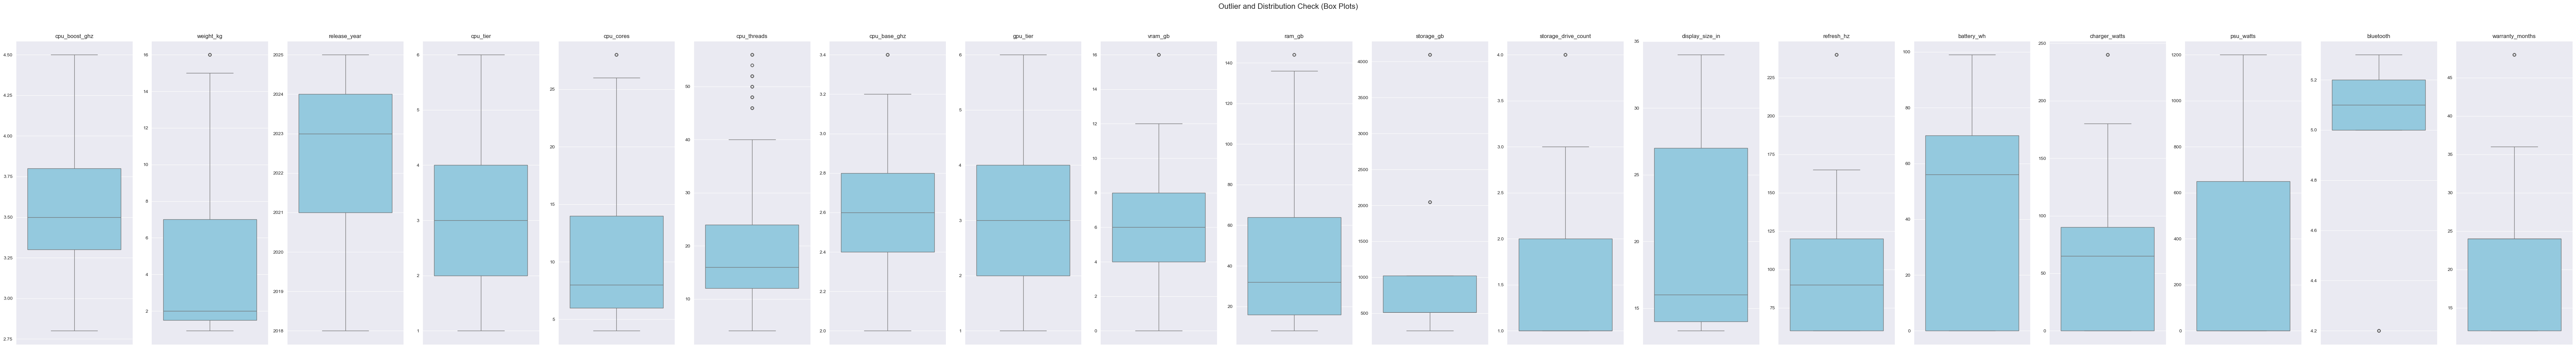

In [5]:
ncols = len(vars_dict["true_numerical_vars"])

fig, axes = plt.subplots(1, ncols, figsize=(4 * ncols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(vars_dict["true_numerical_vars"]):
    sns.boxplot(y=training[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [6]:
from sklearn.model_selection import train_test_split

SEED = 42

X = training[vars_dict["all_vars"]]
y = training["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)

y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

print(X_train.shape, X_test.shape)
print(y_train_log.value_counts())

(70000, 32) (30000, 32)
price
7.391409    66
7.508782    65
7.492197    65
7.346004    65
7.332363    64
            ..
8.167349     1
8.142060     1
6.775355     1
8.362173     1
8.364040     1
Name: count, Length: 3230, dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[vars_dict["true_numerical_vars"]] = scaler.fit_transform(
    X_train[vars_dict["true_numerical_vars"]]
)
X_test_scaled[vars_dict["true_numerical_vars"]] = scaler.transform(
    X_test[vars_dict["true_numerical_vars"]]
)

X_train_final = X_train_scaled.drop(columns=vars_dict["true_categorical_vars"], errors="ignore")
X_test_final  = X_test_scaled.drop(columns=vars_dict["true_categorical_vars"], errors="ignore")

print(f"Final Feature Shape Train: {X_train_final.shape}, Test: {X_test_final.shape}")

Final Feature Shape Train: (70000, 19), Test: (30000, 19)


In [8]:
X_train.head()

,cpu_boost_ghz,weight_kg,release_year,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,gpu_tier,vram_gb,ram_gb,...,os,form_factor,cpu_brand,cpu_model,gpu_brand,gpu_model,storage_type,display_type,resolution,wifi
ID,,,,,,,,,,,,,,,,,,,,,
76513,3.5,1.50,2021,4,12,24,2.6,5,12,64,...,Windows,Mainstream,AMD,AMD Ryzen 7 4567,NVIDIA,RTX 40 80 Ti,NVMe,OLED,1920x1080,Wi-Fi 6
60406,3.8,1.70,2023,5,18,36,2.8,4,10,64,...,macOS,Mainstream,Intel,Intel i7-10237,NVIDIA,RTX 30 80,Hybrid,VA,1920x1080,Wi-Fi 6E
27322,3.9,9.00,2021,4,14,28,3.0,4,10,64,...,Windows,ATX,AMD,AMD Ryzen 7 5231,AMD,RX 6000 80,Hybrid,Mini-LED,2560x1440,Wi-Fi 6E
53699,3.4,1.17,2025,3,8,16,2.4,3,8,32,...,Windows,2-in-1,Intel,Intel i5-11337,NVIDIA,RTX 40 70,HDD,OLED,3840x2160,Wi-Fi 6
65412,3.3,1.53,2022,2,6,12,2.2,2,6,16,...,Windows,Gaming,Intel,Intel i5-12551,NVIDIA,RTX 40 60,NVMe,QLED,2560x1600,Wi-Fi 5


# Evaluation Function

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph, trained):
    if not trained:
        model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"--- {name} ---")
    print(f"Train RMSE: {rmse_train:.4f} | Train R²: {r2_train:.4f}")
    print(f"Test  RMSE: {rmse_test:.4f} | Test  R²: {r2_test:.4f}")

    if (r2_train - r2_test) > 0.05:
        print("⚠️ Warning: Signs of Overfitting (Train R² much higher than Test R²)")
    else:
        print("✅ Model seems reasonably balanced")
    print("-" * 30)

    if graph:
        residuals = y_test - y_pred_test
        r2 = r2_test

        fig, axs = plt.subplots(2, 2, figsize=(12, 10))

        # 1) Predicted vs True
        axs[0, 0].scatter(y_test, y_pred_test, alpha=0.5)
        slope, intercept = np.polyfit(y_test, y_pred_test, 1)
        axs[0, 0].plot(y_test, slope * y_test + intercept, color="blue", label="Regression Line")
        axs[0, 0].plot(
            [y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            color="red", linestyle="--", label="Identity Line"
        )
        axs[0, 0].set_xlabel("True Values")
        axs[0, 0].set_ylabel("Predicted Values")
        axs[0, 0].set_title(f"Predicted vs True ({name})\n$R^2 = {r2:.3f}$")
        axs[0, 0].legend()

        # 2) Residual Histogram
        sns.histplot(residuals, kde=True, bins=20, ax=axs[0, 1])
        axs[0, 1].set_title("Residual Distribution")
        axs[0, 1].set_xlabel("Residual")
        axs[0, 1].set_ylabel("Count")

        # 3) Residuals vs Fitted
        axs[1, 0].scatter(y_pred_test, residuals, alpha=0.5)
        axs[1, 0].axhline(0, color="red", linestyle="--")
        axs[1, 0].set_xlabel("Fitted Values")
        axs[1, 0].set_ylabel("Residuals")
        axs[1, 0].set_title("Residuals vs Fitted")

        # 4) QQ Plot
        stats.probplot(residuals, dist="norm", plot=axs[1, 1])
        axs[1, 1].set_title("QQ Plot")

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test,
        "r2_train": r2_train,
        "r2_test": r2_test,
    }

def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    # Overfitting criterion: big gap in R² between train and test
    df['overfitting_gap'] = df['r2_train'] - df['r2_test']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[~df['is_overfit']].copy()
    df_overfit = df[df['is_overfit']].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ Disqualified for overfitting:")
        display(df_overfit[['model', 'r2_test', 'rmse_test', 'r2_train', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models flagged as overfitting; ranking ALL models by R².")
        df_valid = df.copy()

    print("Best by R² (Test Set):")
    display(df_valid.sort_values(by="r2_test", ascending=False).head(1))

    print("Best by RMSE (Test Set):")
    display(df_valid.sort_values(by="rmse_test", ascending=True).head(1))

    # print("Best by MAE:")
    # display(df_valid.sort_values(by="mae", ascending=True).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_r2"] = df_valid_ranked["r2_test"].rank(ascending=False)
    df_valid_ranked["rank_rmse"] = df_valid_ranked["rmse_test"].rank(ascending=True)
    # df_valid_ranked["rank_mae"] = df_valid_ranked["mae"].rank(ascending=True)

    final_ranking = df_valid_ranked.sort_values(
        by=["rank_r2", "rank_rmse"] #, "rank_mae"]
    )

    # cols = ['model', 'r2', 'rmse', 'mae', 'overfitting_gap']
    cols = ['model', 'r2_test', 'rmse_test', 'overfitting_gap']
    print("\nFinal ranking (better at top):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best regression model: {best_model_name}")

    return best_model_name

# Linear Regression

--- LR ---
Train RMSE: 0.1584 | Train R²: 0.7205
Test  RMSE: 0.1579 | Test  R²: 0.7211
✅ Model seems reasonably balanced
------------------------------


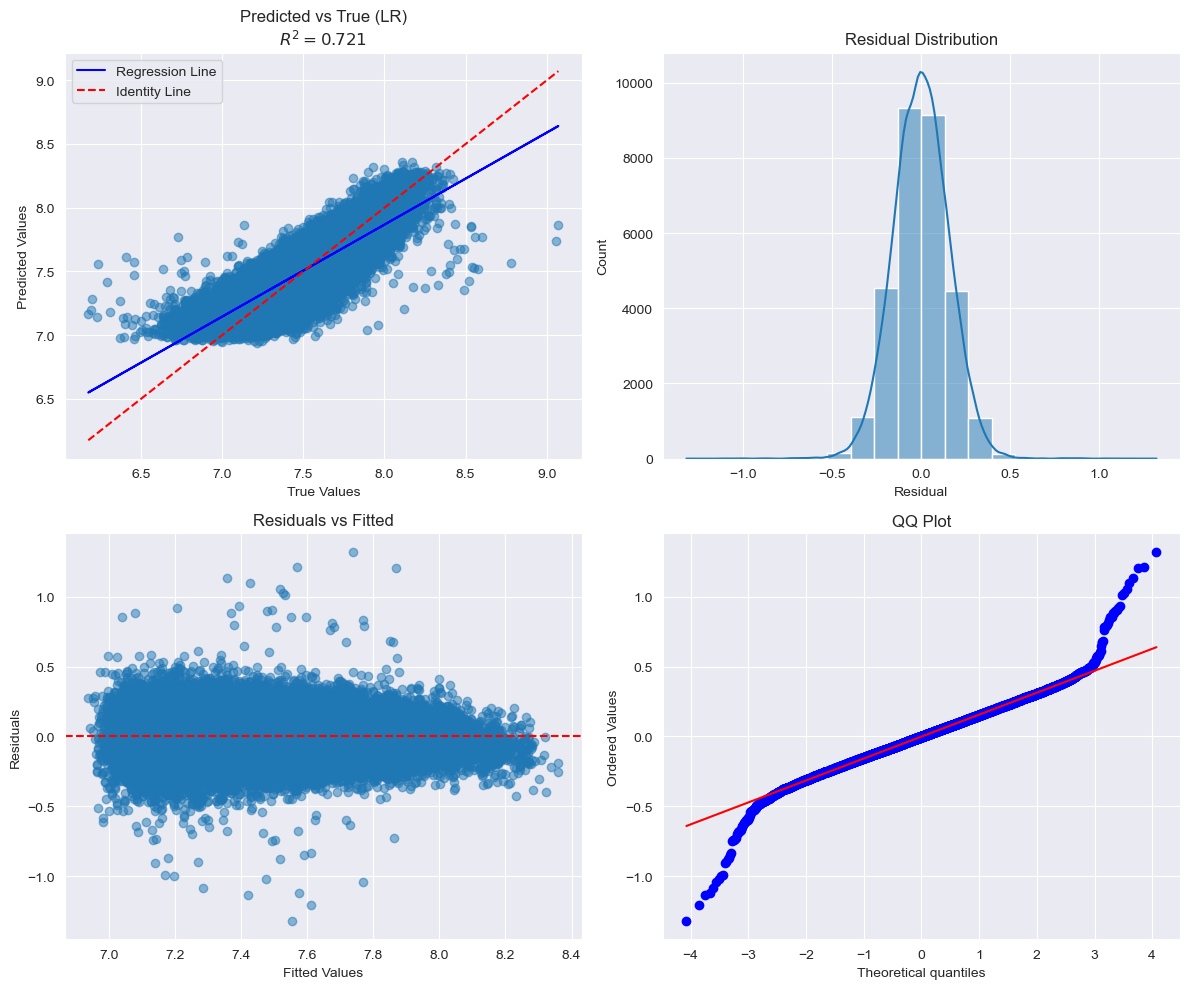

In [10]:
from sklearn.linear_model import LinearRegression

results = []

lr = LinearRegression()
results.append(
    evaluate_and_graph(lr, X_train_final, y_train_log, X_test_final, y_test_log, "LR", True, False)
)

# Poisson Regression

--- Poisson ---
Train RMSE: 0.1637 | Train R²: 0.7015
Test  RMSE: 0.1628 | Test  R²: 0.7035
✅ Model seems reasonably balanced
------------------------------


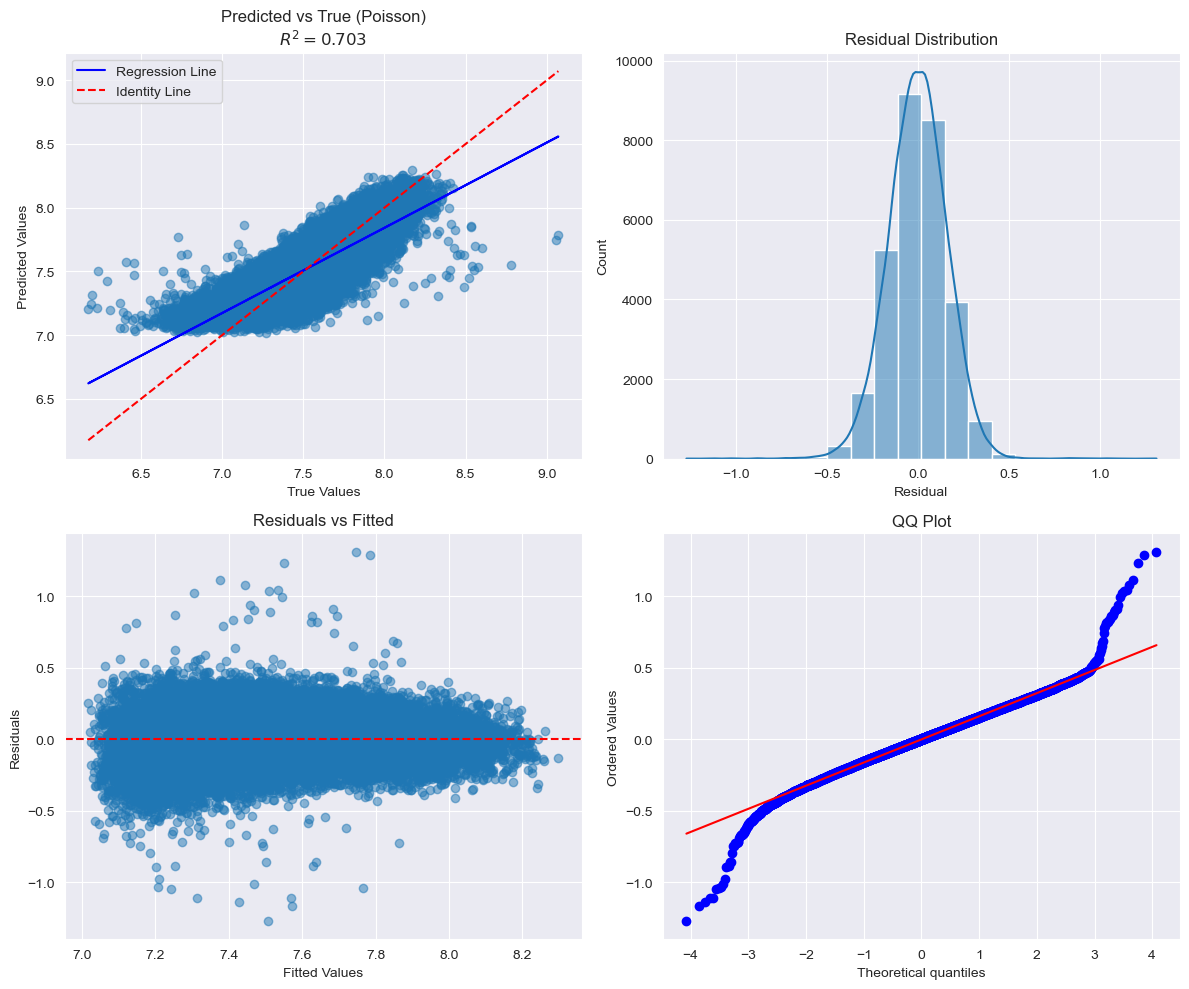

In [11]:
from sklearn.linear_model import PoissonRegressor

if (y_train < 0).any():
    print("Cannot run a Poisson Regression, negative numbers found")
else:
    pr = PoissonRegressor()
    results.append(
        evaluate_and_graph(pr, X_train_final, y_train_log, X_test_final, y_test_log, "Poisson", True, False)
    )

# Shrinkage Methods

--- Ridge (alpha=0.7934) ---
Train RMSE: 0.1584 | Train R²: 0.7205
Test  RMSE: 0.1579 | Test  R²: 0.7211
✅ Model seems reasonably balanced
------------------------------


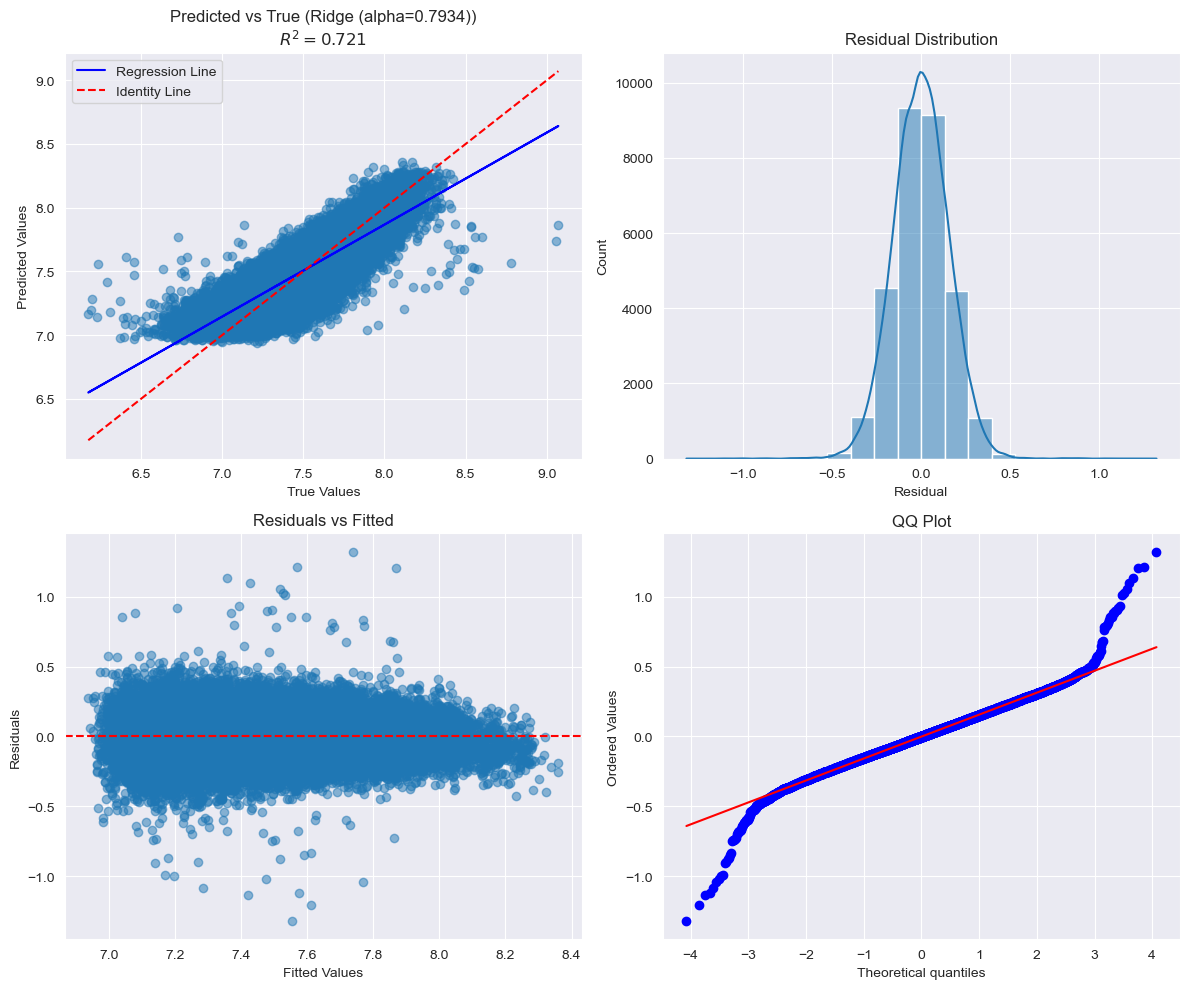

In [14]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-4, 4, 200)

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_final, y_train_log)

ridge_alpha = ridge_cv.alpha_

results.append(
    evaluate_and_graph(ridge_cv, X_train_final, y_train_log, X_test_final, y_test_log, f"Ridge (alpha={ridge_alpha:.4f})", True, True)
)

--- Lasso (alpha=0.0002) ---
Train RMSE: 0.1584 | Train R²: 0.7203
Test  RMSE: 0.1579 | Test  R²: 0.7210
✅ Model seems reasonably balanced
------------------------------


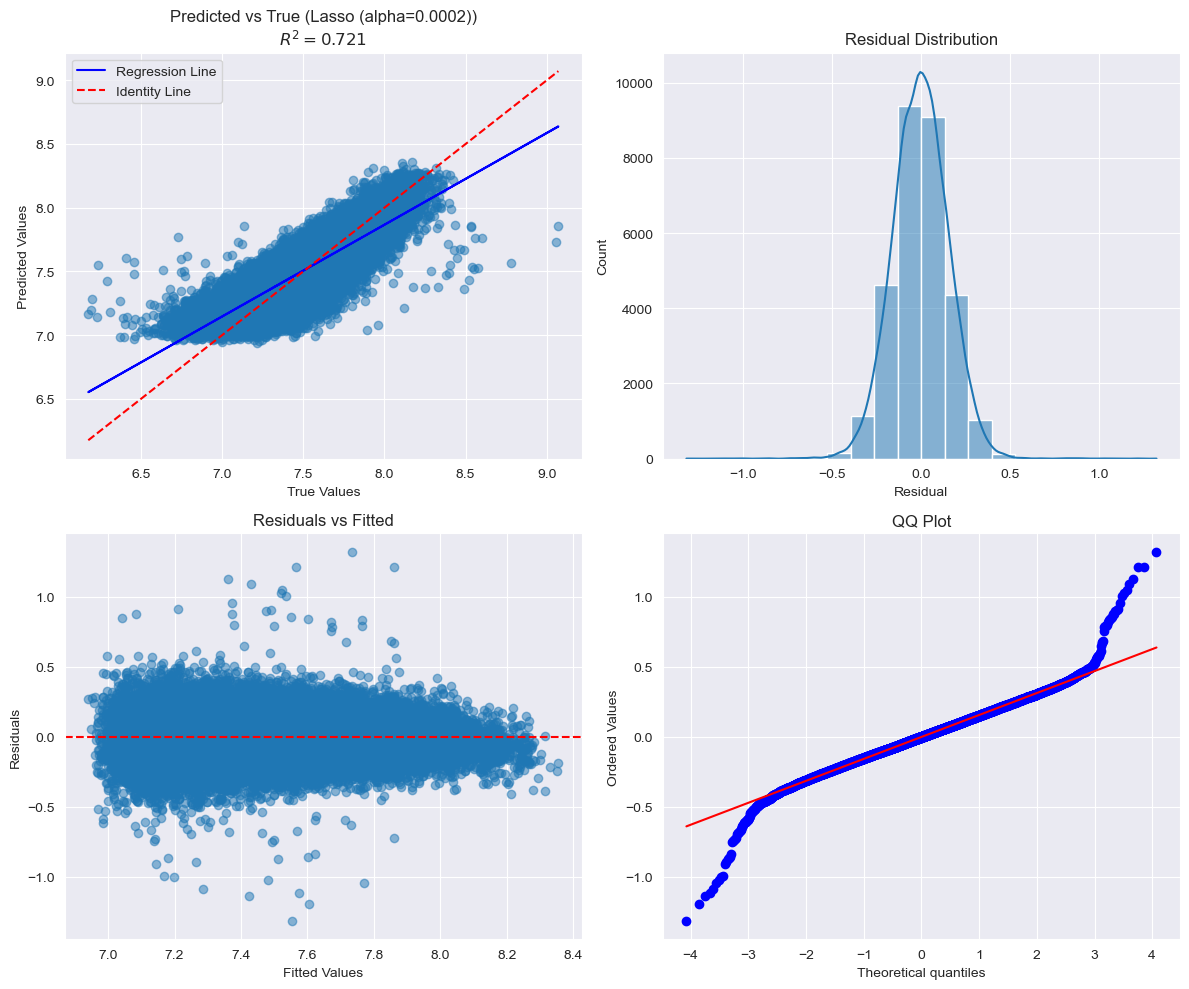

In [15]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(
    cv=10,
    max_iter=5000,
    random_state=SEED
)
lasso_cv.fit(X_train_final, y_train_log)

lasso_alpha = lasso_cv.alpha_

results.append(
    evaluate_and_graph(lasso_cv, X_train_final, y_train_log, X_test_final, y_test_log, f"Lasso (alpha={lasso_alpha:.4f})", True, True)
)

--- ElasticNet (alpha=0.0002, l1_ratio=0.99) ---
Train RMSE: 0.1584 | Train R²: 0.7203
Test  RMSE: 0.1579 | Test  R²: 0.7210
✅ Model seems reasonably balanced
------------------------------


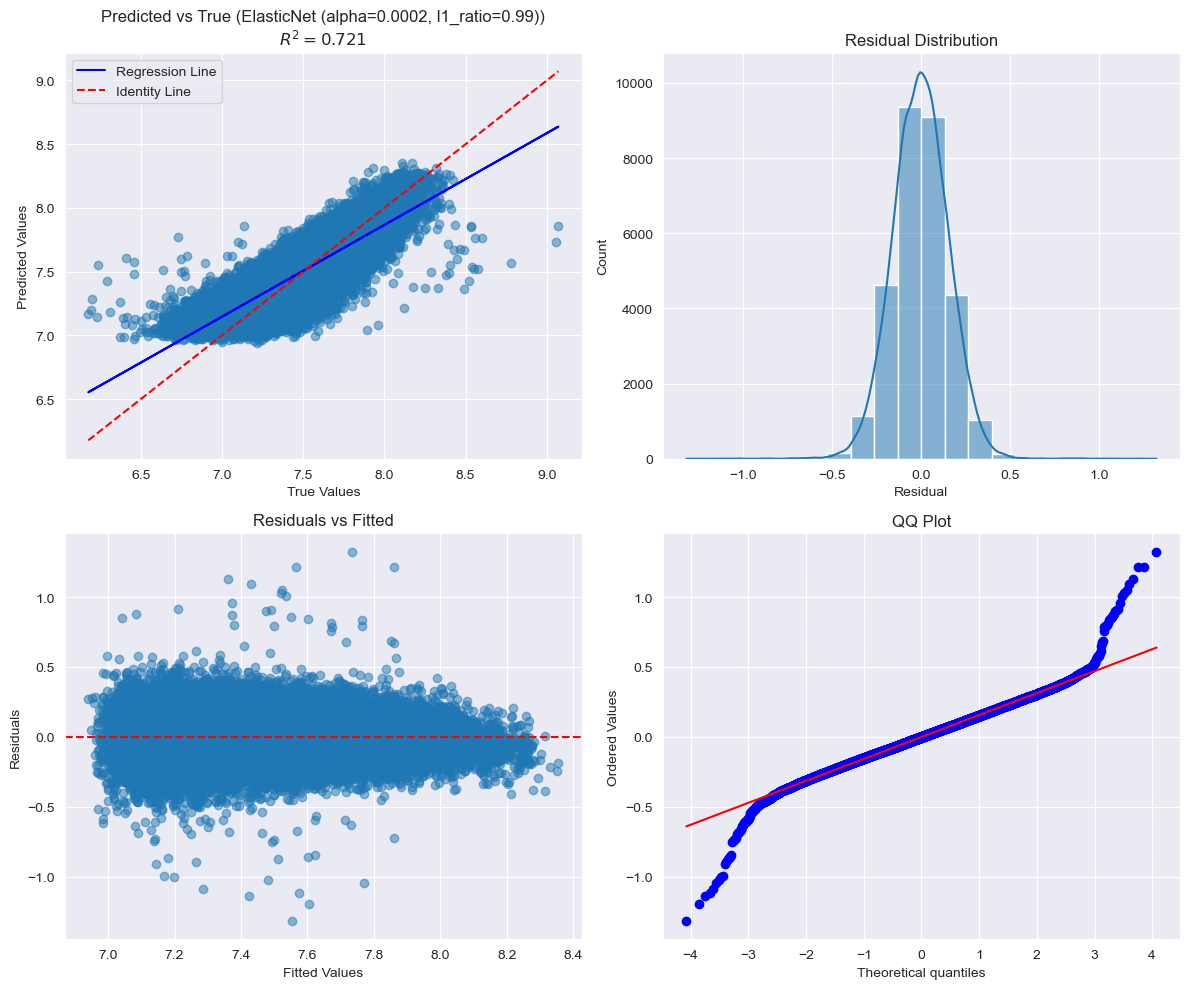

In [16]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(
    l1_ratio=np.linspace(0.01, 0.99, 20),
    cv=10,
    max_iter=5000,
    random_state=SEED
)
elastic_cv.fit(X_train_final, y_train_log)

elastic_alpha = elastic_cv.alpha_
elastic_l1 = elastic_cv.l1_ratio_

results.append(
    evaluate_and_graph(elastic_cv, X_train_final, y_train_log, X_test_final, y_test_log, f"ElasticNet (alpha={elastic_alpha:.4f}, l1_ratio={elastic_l1:.2f})", True, True)
)

# Regression Tree

--- Regression Tree ---
Train RMSE: 0.1651 | Train R²: 0.6964
Test  RMSE: 0.1654 | Test  R²: 0.6940
✅ Model seems reasonably balanced
------------------------------


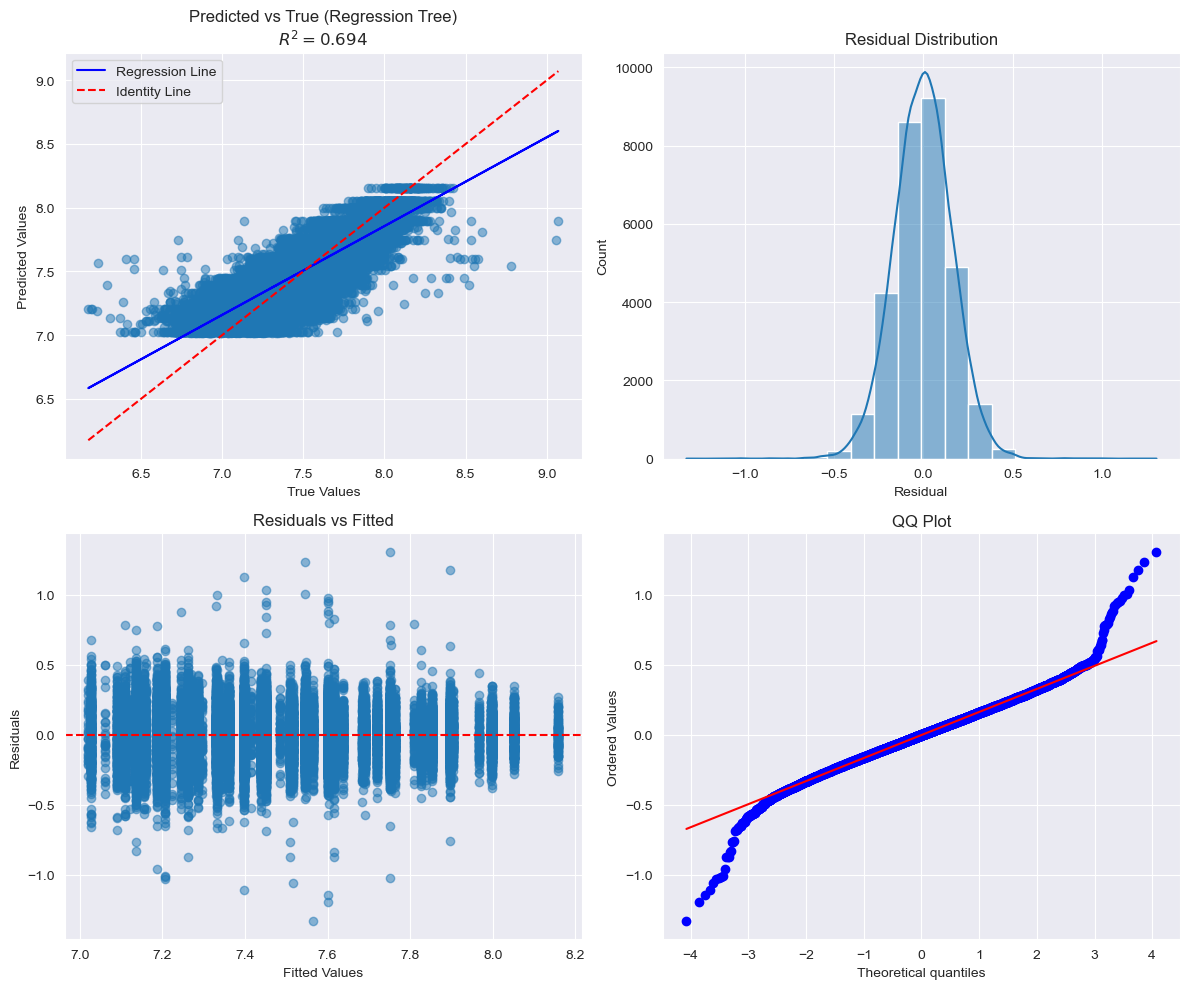

In [17]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=SEED, max_depth=6)
results.append(
    evaluate_and_graph(reg_tree, X_train_final, y_train_log, X_test_final, y_test_log, "Regression Tree", True, False)
)

# Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, loguniform
#
# gb_hyper = GradientBoostingClassifier(random_state=SEED)
# rf_hyper = RandomForestClassifier(random_state=SEED)
# dt_hyper_entropy = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
#
# param_distributions_gb = {
#     'n_estimators': randint(low=50, high=500),
#     'learning_rate': loguniform(0.001, 0.2),
#     'max_depth': randint(3, 8)
# }
#
# param_distributions_rf = {
#     'n_estimators': randint(low=100, high=500),
#     'max_depth': [10, 20, 30],
#     'min_samples_split': randint(2, 20),
#     'max_features': ['sqrt', 'log2', 0.6, 0.8]
# }
#
# param_distributions_dt = {
#     'max_depth': randint(5, 30),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 10)
# }
#
# N_ITERATIONS = 5
#
# random_search_gb = RandomizedSearchCV(
#     estimator=gb_hyper,
#     param_distributions=param_distributions_gb,
#     n_iter=N_ITERATIONS,
#     cv=3,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=-1,
#     random_state=SEED
# )
#
# random_search_rf = RandomizedSearchCV(
#     estimator=rf_hyper,
#     param_distributions=param_distributions_rf,
#     n_iter=N_ITERATIONS,
#     cv=3,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=-1,
#     random_state=SEED
# )
#
# random_search_dt = RandomizedSearchCV(
#     estimator=dt_hyper_entropy,
#     param_distributions=param_distributions_dt,
#     n_iter=N_ITERATIONS*10,
#     cv=3,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=-1,
#     random_state=SEED
# )

In [ ]:
# print("\nStarting GridSearchCV for Gradient Boosting...")
# random_search_gb.fit(X_train, y_train)
#
# print("--- Gradient Boosting (Tuned) Results ---")
# print(f"Best Parameters: {random_search_gb.best_params_}")
# print(f"Best Score: {random_search_gb.best_score_}")
#
# best_random_search_gb = random_search_gb.best_estimator_
#
# results.append(
#     evaluate_and_graph(best_random_search_gb, X_train_final, y_train_log, X_test_final, y_test_log, "Gradient Boosting (Tuned)", True)
# )

In [ ]:
# print("Starting GridSearchCV for Random Forest...")
# random_search_rf.fit(X_train, y_train)
#
# print("--- Random Forest Results ---")
# print(f"Best Parameters: {random_search_rf.best_params_}")
# print(f"Best Score: {random_search_rf.best_score_}")
#
# best_random_search_rf = random_search_rf.best_estimator_
#
# results.append(
#     evaluate_and_graph(best_random_search_rf, X_train_final, y_train_log, X_test_final, y_test_log, "Random Forest (Tuned)", True)
# )

In [ ]:
# print("\nStarting GridSearchCV for Decision Tree (Entropy)...")
# random_search_dt.fit(X_train, y_train)
#
# print("--- Decision Tree (Entropy) Results ---")
# print(f"Best Parameters: {random_search_dt.best_params_}")
# print(f"Best Score: {random_search_dt.best_score_}")
#
# best_random_search_dt = random_search_dt.best_estimator_
#
# results.append(
#     evaluate_and_graph(best_random_search_dt, X_train_final, y_train_log, X_test_final, y_test_log, "Decision Tree (Entropy, Tuned)", True)
# )

# Results

In [18]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 6
Valid Models: 6
Disqualified Models: 0

✅ No models were disqualified for overfitting.
Best by R² (Test Set):


,model,rmse_train,rmse_test,r2_train,r2_test,overfitting_gap,is_overfit
2,Ridge (alpha=0.7934),0.15837,0.157859,0.720488,0.721128,-0.00064,False


Best by RMSE (Test Set):


,model,rmse_train,rmse_test,r2_train,r2_test,overfitting_gap,is_overfit
2,Ridge (alpha=0.7934),0.15837,0.157859,0.720488,0.721128,-0.00064,False



Final ranking (better at top):


,model,r2_test,rmse_test,overfitting_gap
2,Ridge (alpha=0.7934),0.721128,0.157859,-0.000640
0,LR,0.721127,0.157860,-0.000639
3,Lasso (alpha=0.0002),0.720956,0.157908,-0.000660
4,"ElasticNet (alpha=0.0002, l1_ratio=0.99)",0.720956,0.157908,-0.000660
1,Poisson,0.703485,0.162777,-0.001947
5,Regression Tree,0.693996,0.165361,0.002403



🏆 Best regression model: Ridge (alpha=0.7934)


# Submission for Kaggle

Manual Process, must use results to correctly call the best model

In [23]:
testing_scaled = testing.copy()

testing_scaled[vars_dict["true_numerical_vars"]] = scaler.transform(
    testing[vars_dict["true_numerical_vars"]]
)

testing_final = testing_scaled.drop(columns=vars_dict["true_categorical_vars"], errors="ignore")

train_cols = X_train_final.columns
testing_final = testing_final.reindex(columns=train_cols, fill_value=0)

print(f"Testing shape:  {testing_scaled.shape}")

Testing shape:  (50000, 32)


In [25]:
predictions_log = ridge_cv.predict(testing_final)

sigma2 = np.var(y_train_log - ridge_cv.predict(X_train_final))
predictions = np.expm1(predictions_log + 0.5 * sigma2)

submission = pd.DataFrame({
    'id': testing.index,
    'price': predictions
})

submission.to_csv('ridge_alpha.7934_sigma_corrected.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


,id,price
0,100000,2548.513279
1,100001,2180.456225
2,100002,1346.294461
3,100003,1492.902557
4,100004,3688.199420
